<a href="https://colab.research.google.com/github/RahafAlshahrany/Capstone_Project/blob/main/capston2/Churn%20Prediction_Student_Notebook_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
Rahaf = 'HR_Dataset.csv'
Husam = '/content/drive/MyDrive/Colab Notebooks/Datasets/HR_Dataset.csv'

In [5]:
df = pd.read_csv(Husam)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## 1. Exploratory Data Analysis

In [8]:
df.shape

(14999, 10)

In [9]:
df.size

149990

In [10]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [11]:
df.duplicated().sum()

3008

In [12]:
df2 = df.copy()

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.duplicated().sum()

0

In [16]:
df.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

## 2. Data Visualization

Questions
* Left vs promotion_last_5years
* Left vs work_accident
* Left vs number_projects
* Departments vs salary
* Left vs departments
* average time spended in company
* Left vs ALL FEATURES

In [19]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [34]:
is_left = df[df['left']== 1]
not_left = df[df['left'] == 0]

In [33]:
is_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
1995,0.37,0.57,2,147,3,0,1,0,sales,low
1996,0.11,0.92,7,293,4,0,1,0,sales,low
1997,0.41,0.53,2,157,3,0,1,0,sales,low
1998,0.84,0.96,4,247,5,0,1,0,sales,low


In [55]:
df.time_spend_company.value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

In [56]:
df.number_project.value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

In [57]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f'Value counts for column: {column}')
    print(value_counts)
    print()

Value counts for column: satisfaction_level
0.74    214
0.10    203
0.73    201
0.50    200
0.72    199
       ... 
0.25     29
0.26     28
0.12     26
0.28     24
0.27     23
Name: satisfaction_level, Length: 92, dtype: int64

Value counts for column: last_evaluation
0.55    281
0.50    269
0.51    264
0.57    258
0.54    252
       ... 
0.42     45
0.43     44
0.38     42
0.44     35
0.36     19
Name: last_evaluation, Length: 65, dtype: int64

Value counts for column: number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

Value counts for column: average_montly_hours
156    112
149    112
160    111
151    107
135    104
      ... 
298      5
302      5
297      5
299      5
303      5
Name: average_montly_hours, Length: 215, dtype: int64

Value counts for column: time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

Value counts for col

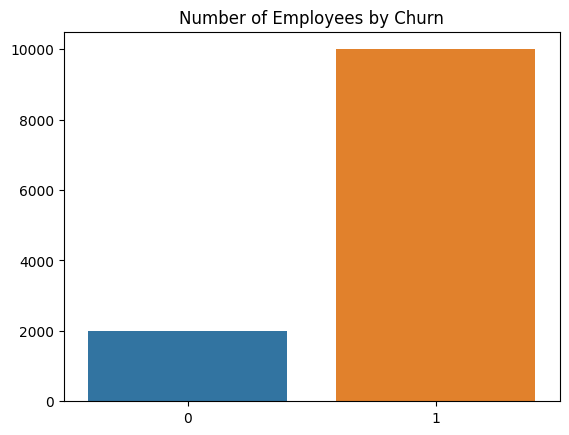

In [51]:
emp = df["left"]
plt.title("Number of Employees by Churn")
sns.barplot(x=emp.unique(), y=emp.value_counts().values)
plt.show()

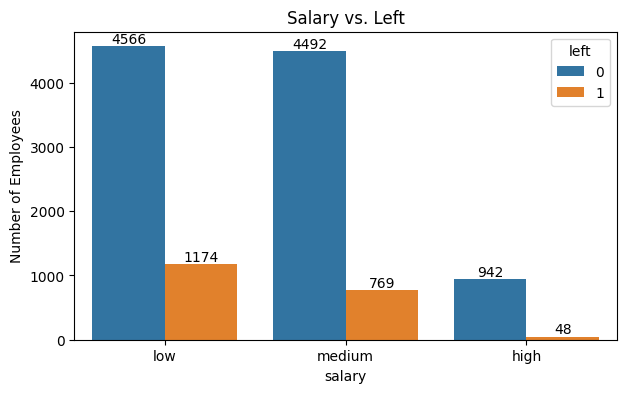

In [50]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="salary",
                   data=df,
                   hue = "left",)
for p in ax.containers:
    ax.bar_label(p)
    plt.title('Salary vs. Left')
    plt.ylabel('Number of Employees')

TODO: Add the ratio
* 0.048 - high
* 0.14 - medium

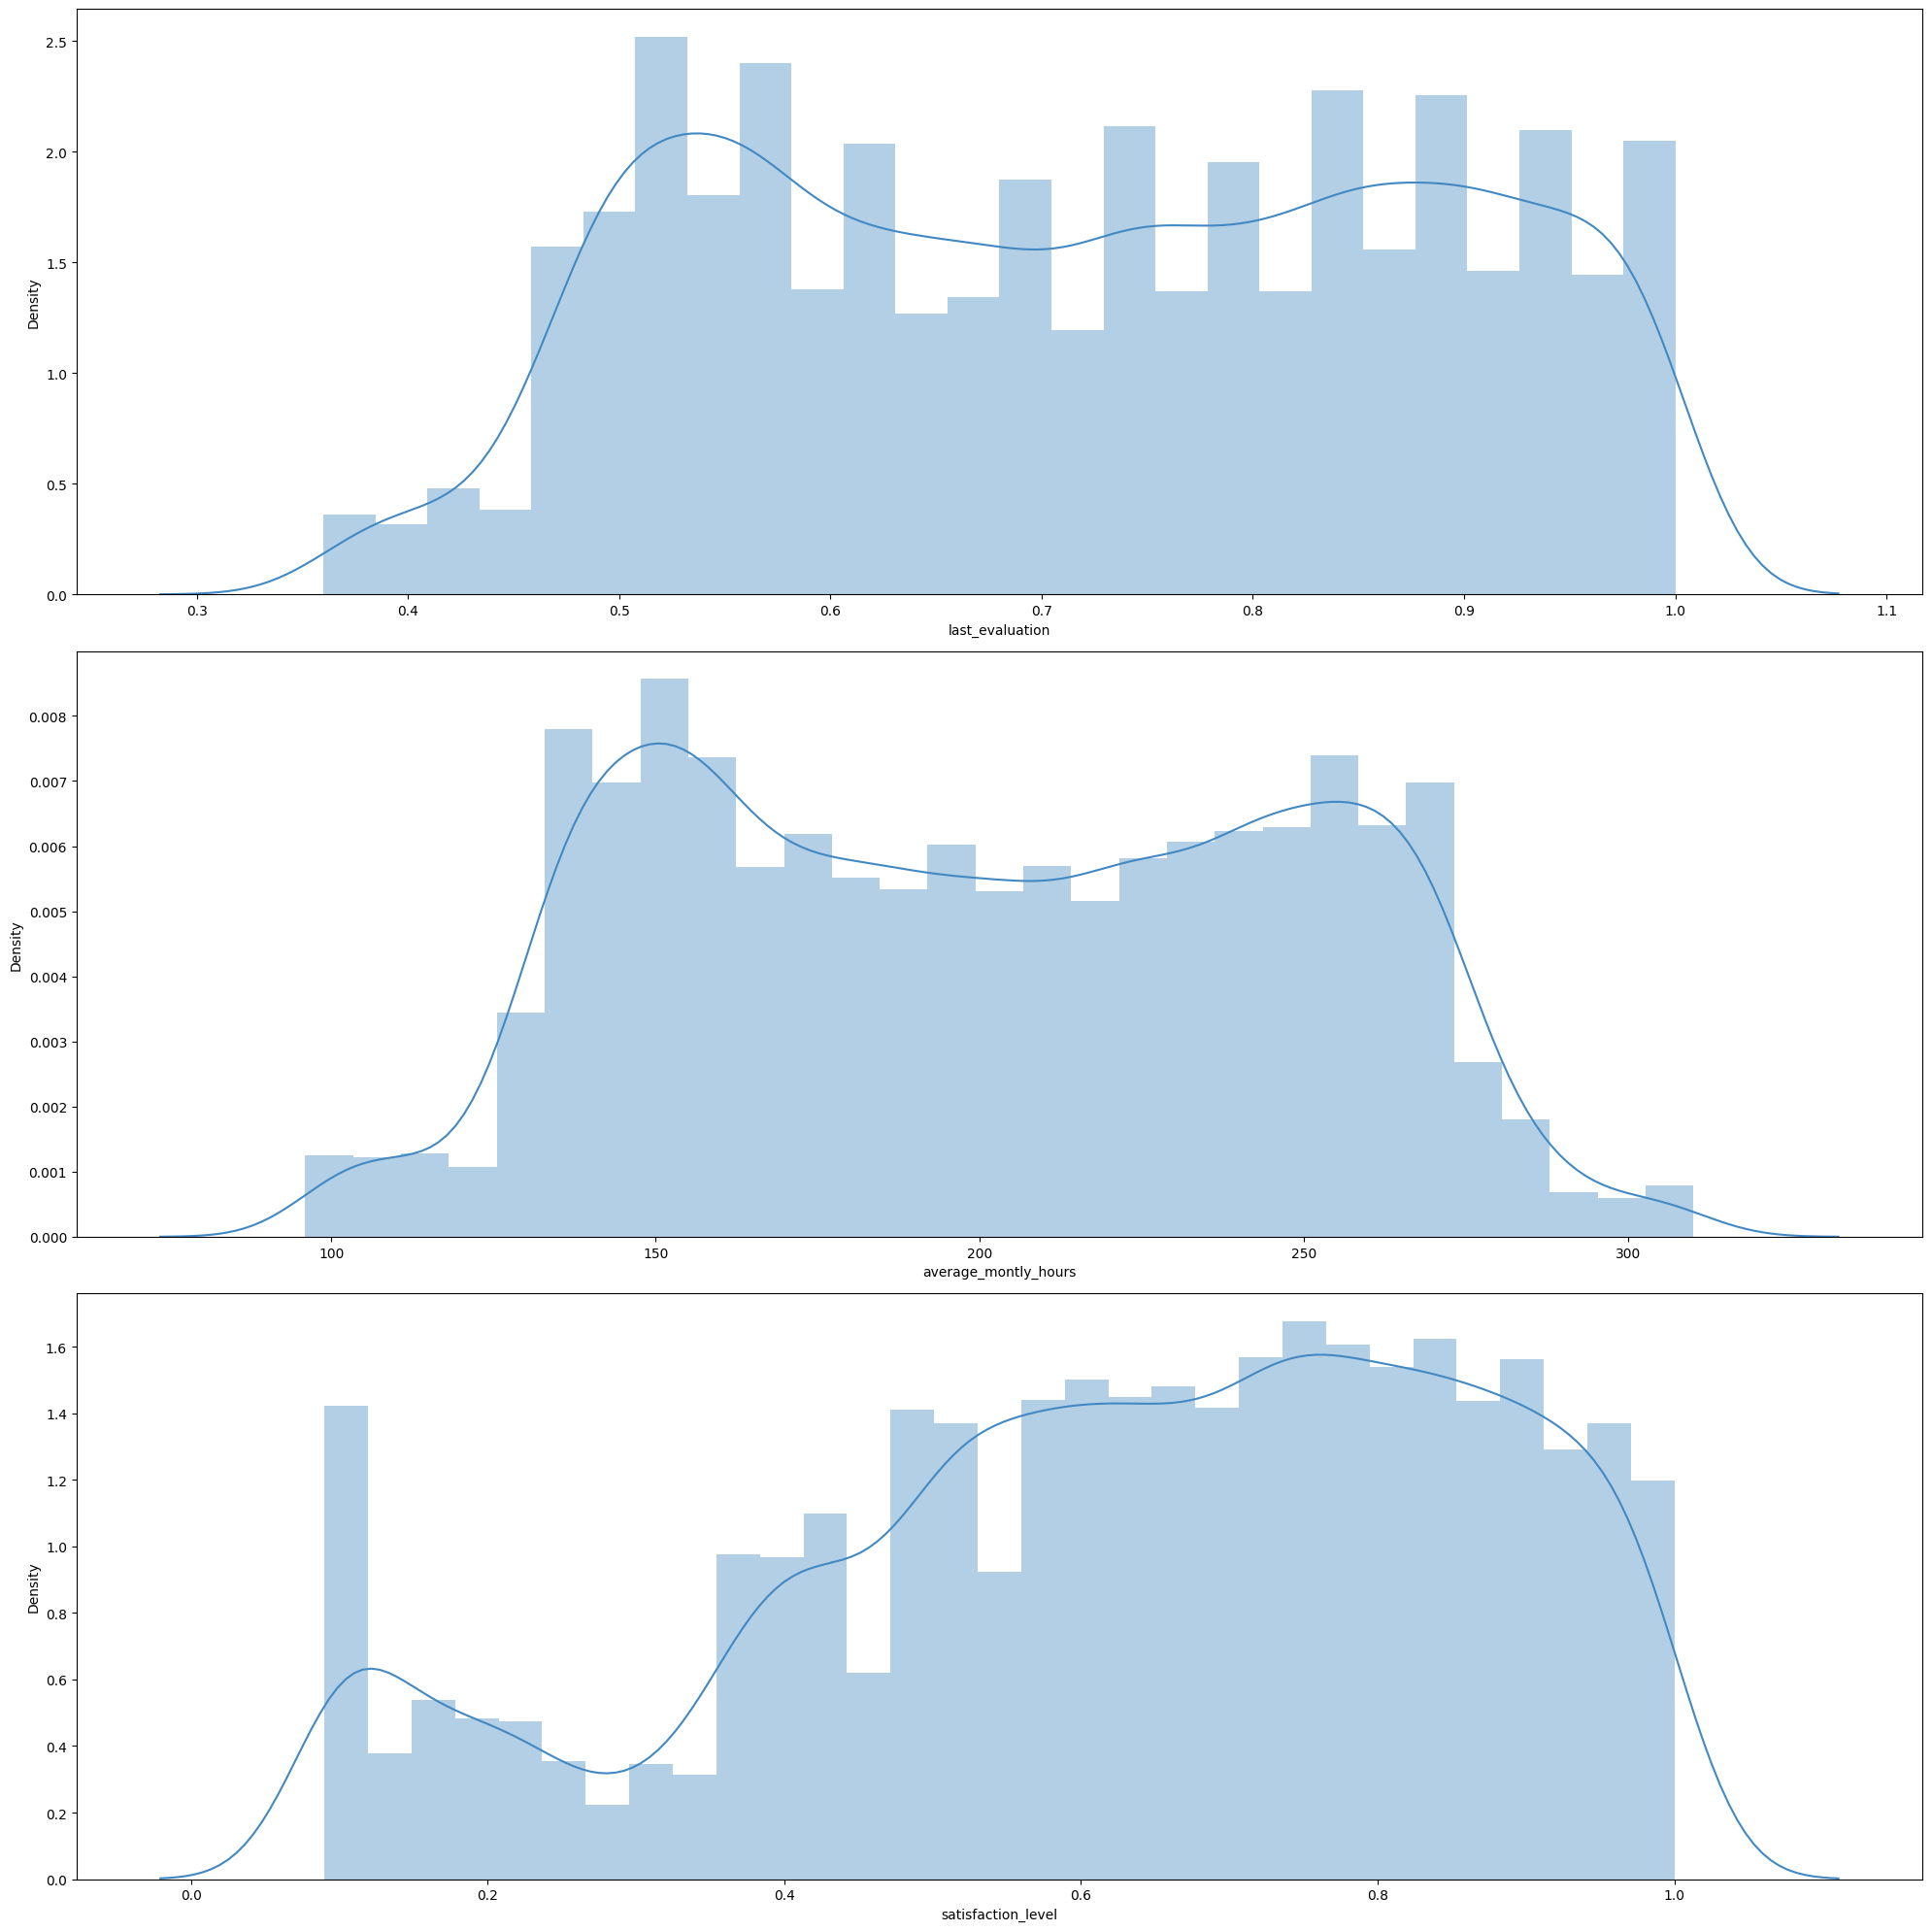

In [62]:
plt.figure(figsize = (20, 20))
column=["last_evaluation","average_montly_hours", 'satisfaction_level']
for i in range(0,3):
    plt.subplot(3, 1, i+1)
    sns.distplot(df[column[i]], color="#4288c2")    #histplot,distplot
    plt.tight_layout()

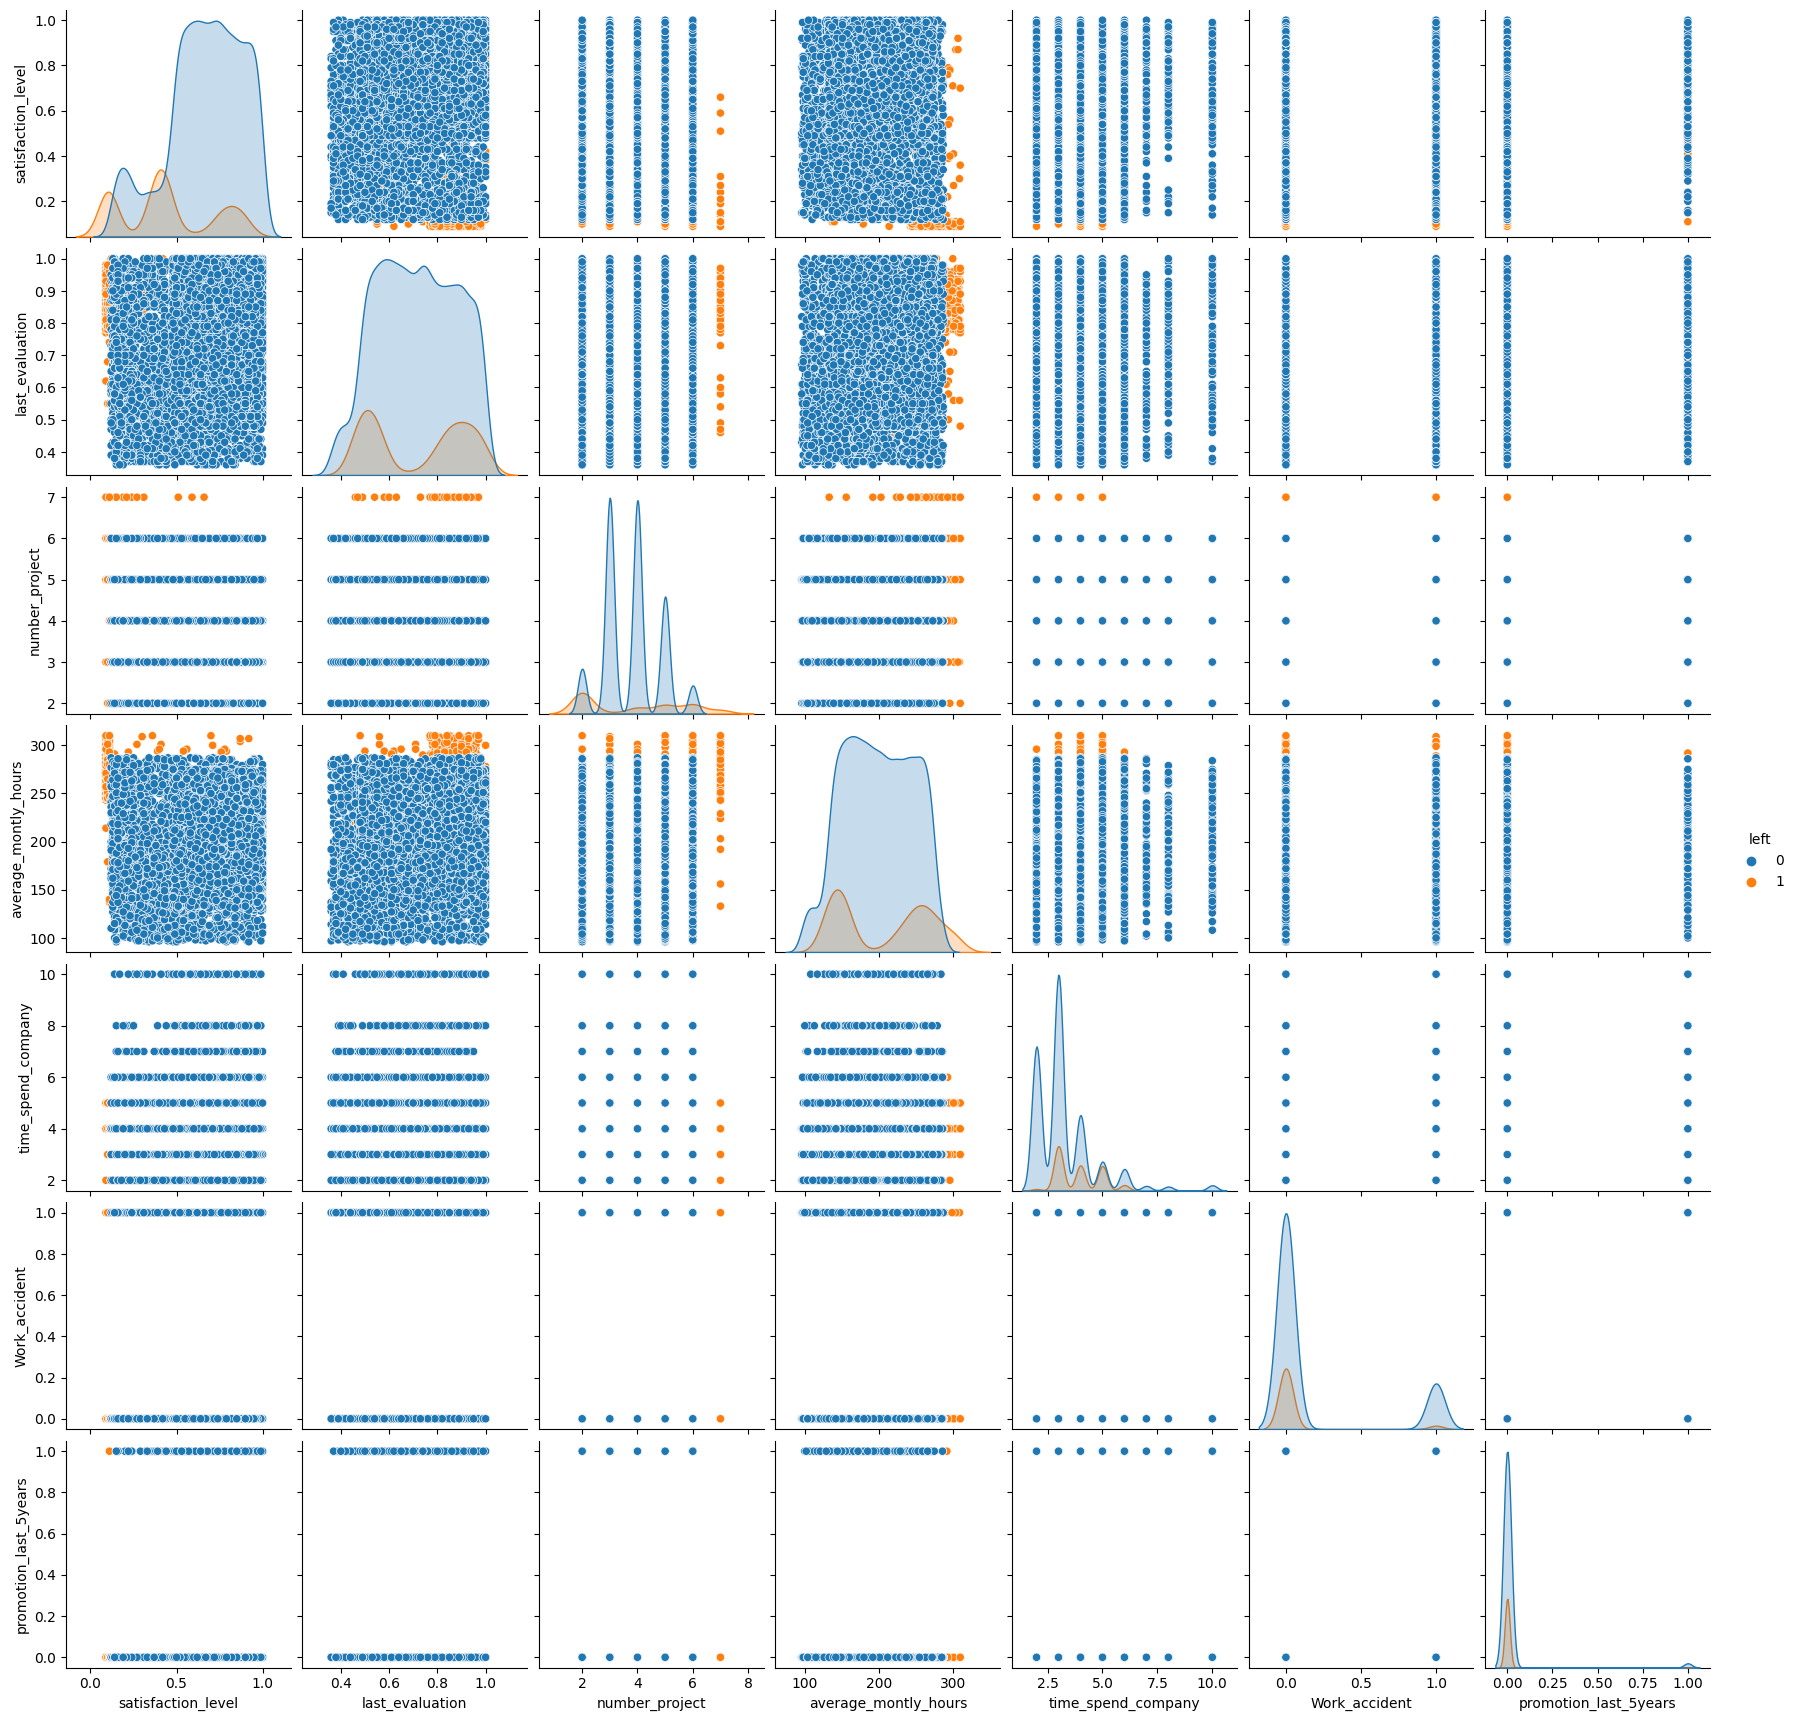

In [59]:
sns.pairplot(data=df,hue='left')

### Scaling the data

In [76]:
df.salary.value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder

In [77]:
cat_onehot = ["Departments "]

ordinal = ['salary']
ord_for_salary = ['low', 'medium', 'high']

In [98]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [ord_for_salary],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,ordinal),
                        remainder= StandardScaler(),
                         verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")

In [99]:
from sklearn.pipeline import Pipeline
operations = [("encoder", column_trans)]

pipeline = Pipeline(steps=operations)

In [100]:
scaled_df = pipeline.fit_transform(df)

In [103]:
scaled_df

,Departments _IT,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,-0.427116,2.241116,-0.131228
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.706637,0.851380,1.029194,1.262709,1.981036,-0.427116,2.241116,-0.131228
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-2.155721,0.970190,2.748604,1.467939,0.477485,-0.427116,2.241116,-0.131228
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.374770,0.910785,1.029194,0.462311,1.229261,-0.427116,2.241116,-0.131228
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,-0.427116,2.241116,-0.131228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.121472,-0.990180,-0.690216,1.201140,4.988139,2.341286,-0.446206,7.620300
11996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.457736,1.386026,1.029194,1.344801,4.988139,-0.427116,-0.446206,7.620300
11997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.914054,-1.049585,-0.690216,-0.317563,4.988139,-0.427116,-0.446206,7.620300
11998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,-1.243085,-0.396129,-0.690216,-0.584363,4.988139,-0.427116,-0.446206,7.620300


## 4. Cluster Analysis

In [80]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Calculating Hopkins score to know whether the data is good for clustering or not.
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
    return HS

In [91]:
hopkins(scaled_df)

0.9204271310922136

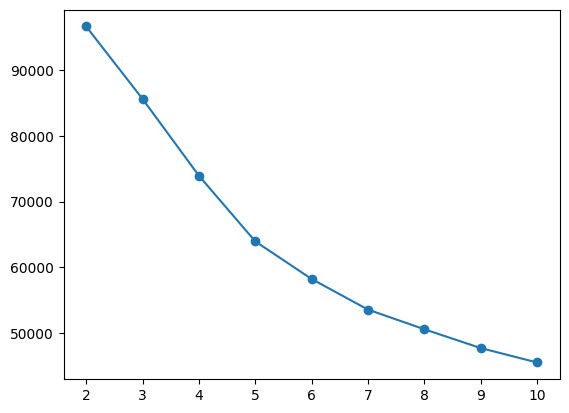

In [101]:
from sklearn.cluster import KMeans

n_clusters = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(scaled_df)
    n_clusters.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(2,11),n_clusters,marker='o');

In [102]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_df)
    clusterlabels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, clusterlabels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.23217050222370664
For n_clusters=3, the silhouette score is 0.2456924399651833
For n_clusters=4, the silhouette score is 0.21563829227440298
For n_clusters=5, the silhouette score is 0.2624985819098466
For n_clusters=6, the silhouette score is 0.26369546413511463
For n_clusters=7, the silhouette score is 0.19250540444693587
For n_clusters=8, the silhouette score is 0.20272190363574877
For n_clusters=9, the silhouette score is 0.1931848463221435
For n_clusters=10, the silhouette score is 0.19947385829044254


###

In [65]:
from sklearn.cluster import KMeans

kmeans = kmeans(n_clusters=2)

Text(0.5, 1.0, 'elbow method')

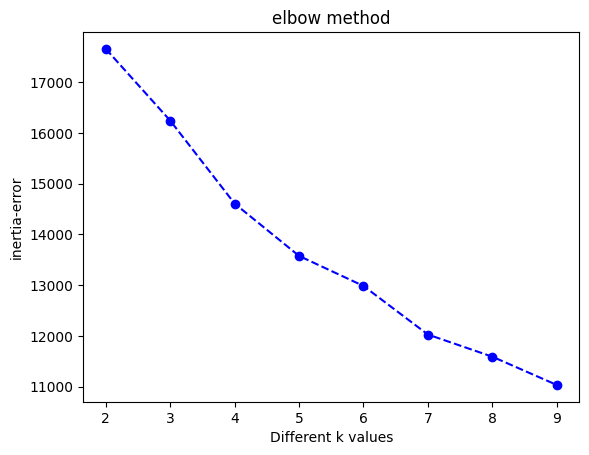

In [97]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(scaled_df)
    ssd.append(model.inertia_)
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

## 5. Predictive Model Building

### Preprocessing

### Classification Algorithms
 - Try at least 4 ML/DL algorithms.

#### Model Building

#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

####  Prediction

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___